# CartPole Gym environment with TfAgents

## Install packages (gym, tfagents, tensorflow,....)

In [ ]:
!pip install easyagents >/dev/null

##### suppress package warnings, prepare matlab, if in colab: load additional packages for rendering

In [1]:
import sys
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    

## Dry Run (very short training)

In [2]:
from easyagents.tfagents import DqnAgent
from easyagents.tfagents import PpoAgent
from easyagents.config import TrainingFast
from easyagents.config import LoggingVerbose
from easyagents.config import LoggingNormal

ppoAgent = DqnAgent( gym_env_name='CartPole-v0', training=TrainingFast(), logging=LoggingNormal())
ppoAgent.train()

I0731 23:39:44.662400 13548 agents.py:115] DqnAgent on CartPole-v0 [fc_layers=(75, 75), learning_rate=0.001]
I0731 23:39:44.663365 13548 agents.py:115] Training 9=3*3 episodes [max 500 steps/episode, 1 epochs/iteration, policy eval every 3=1*3 episodes]
I0731 23:39:44.664385 13548 agents.py:110] executing: tf.compat.v1.enable_v2_behavior()
I0731 23:39:44.665401 13548 agents.py:110] executing: tf.enable_eager_execution()
I0731 23:39:44.666366 13548 agents.py:110] executing: tf.compat.v1.set_random_seed(0)
I0731 23:39:44.669372 13548 agents.py:110] Creating environment:
I0731 23:39:44.670364 13548 agents.py:110]    executing tf_py_environment.TFPyEnvironment( suite_gym.load )
I0731 23:39:44.676376 13548 agents.py:110] Creating agent:
I0731 23:39:44.678706 13548 agents.py:110]   creating  tf.compat.v1.train.AdamOptimizer( ... )
I0731 23:39:44.679506 13548 agents.py:110]   creating  QNetwork( ... )
I0731 23:39:44.684520 13548 agents.py:110]   creating  DqnAgent( ... )
I0731 23:39:44.693231

Note that rewards and step count are equal. That's because the CartPole environment doles out 1 reward point for 
each successful step, and stops after the first failed step.

## Default training with a movie (on a self-defined network)

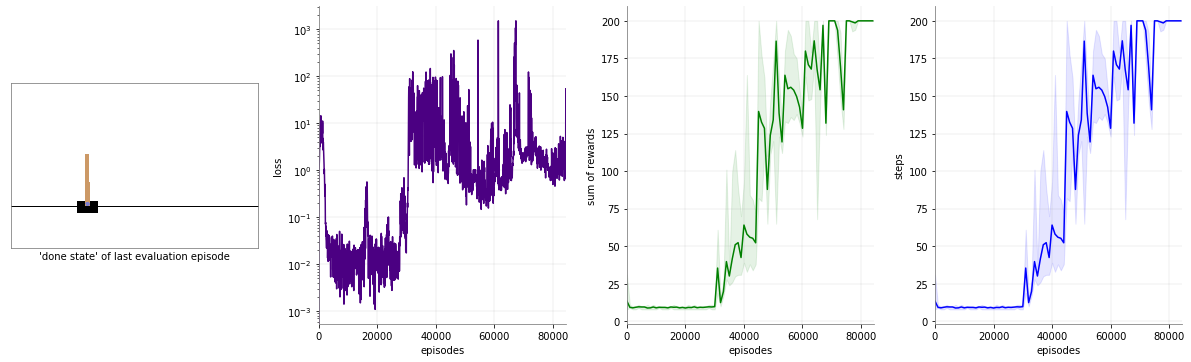

In [ ]:
from easyagents.tfagents import DqnAgent
from easyagents.config import Training

dqnAgent = DqnAgent(    gym_env_name = 'CartPole-v0', fc_layers=(100,), 
                        num_steps_in_replay_buffer=5000,
                        num_episodes_to_preload_replay_buffer=100,
                        num_steps_in_replay_batch=64,
                        training=Training(                 
                            num_iterations = 100000,
                            num_episodes_per_iteration = 50,
                            max_steps_per_episode = 200,
                            num_iterations_between_eval=20,
                            num_epochs_per_iteration = 10) )
dqnAgent.train()

The fc_layers argument defines the policy's neural network architecture. Here we use 3 fully connected layers
with 100 neurons in the first, 50 in the second and 25 in the final layer. 
By default fc_layers=(75,75) is used.

The 'sum of rewards' - as well as the steps - plot shows the evaluation of the current policy.
The line depicts the average sum of rewards over all games played during evaluation,
the area the corresponding min and max values.

Note: 
The policy evaluation is controlled through the Agent's training argument.
By default 10 evaluation episodes are used.
The training configuration TrainingFast() in the previous cell is set to 1 evaluation episode. 
Thus min, max and average are all equal and hence no area is visible.

### Replot the training statistics

In [ ]:
_ = dqnAgent.plot_episodes()

### Visualize the trained policy playing a game

In [ ]:
dqnAgent.render_episodes_to_jupyter(num_episodes=1, fps=50)

## Next: Custom training (self-defined training scheme & logging)

* see [Berater on colab](https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/easyagents_berater.ipynb)
  (an example of a gym environment implementation based on a routing problem)

